# Clusterização de perfis de usuário

In [1]:
import os.path

import math
import random
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans

In [2]:
df = pd.read_csv('./ubmg-data/dataframe/users-profile.tsv', sep='\t')

df.head(15)

,Unnamed: 0.1,Unnamed: 0,user,0-0,0-1,0-2,1-0,1-1,1-2,2-0,2-1,2-2,labels
0,0,0,187754506--1001034598292,0.875000,0.083333,0.041667,0.000000,0.962264,0.037736,0.030000,0.060000,0.910000,1
1,1,0,83860966--1001034598292,0.000000,1.000000,0.000000,0.038462,0.923077,0.038462,0.000000,0.200000,0.800000,0
2,2,0,30358316--1001034598292,0.895652,0.069565,0.034783,0.012797,0.897623,0.089580,0.007564,0.072617,0.919818,1
3,3,0,36412875--1001034598292,0.894737,0.105263,0.000000,0.016949,0.932203,0.050847,0.032258,0.064516,0.903226,1
4,4,0,33928731--1001034598292,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0
5,5,0,20298314--1001034598292,0.666667,0.333333,0.000000,0.036364,0.872727,0.090909,0.055556,0.166667,0.777778,1
6,6,0,110208129--1001034598292,0.631579,0.184211,0.184211,0.130435,0.724638,0.144928,0.067568,0.148649,0.783784,1
7,7,0,146298403--1001034598292,1.000000,0.000000,0.000000,0.000000,0.969231,0.030769,0.142857,0.142857,0.714286,1
8,8,0,49490074--1001053615329,0.894737,0.052632,0.052632,0.004310,0.956897,0.038793,0.021739,0.195652,0.782609,1
9,9,0,87681147--1001053615329,0.600000,0.100000,0.300000,0.022472,0.730337,0.247191,0.020619,0.237113,0.742268,0


In [3]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,0-0,0-1,0-2,1-0,1-1,1-2,2-0,2-1,2-2,labels
count,11695.000000,11695.0,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000
mean,5847.000000,0.0,0.870940,0.036640,0.046589,0.294670,0.586892,0.076454,0.213253,0.041677,0.427841,1.494741
std,3376.200034,0.0,0.232251,0.094940,0.092076,0.338910,0.362732,0.165317,0.295801,0.122999,0.387661,0.902433
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2923.500000,0.0,0.878788,0.000000,0.000000,0.033333,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5847.000000,0.0,0.951965,0.005988,0.014925,0.142857,0.714286,0.000000,0.072368,0.000000,0.500000,1.000000
75%,8770.500000,0.0,0.985699,0.037037,0.053144,0.500000,0.900000,0.076923,0.333333,0.025000,0.809524,2.000000
max,11694.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
dropped_df = df.drop(columns=['user', 'Unnamed: 0', 'Unnamed: 0.1', 'labels'])
columns = dropped_df.columns
pca = PCA(n_components=len(columns))

pca.fit(dropped_df)

pca_data = pca.transform(dropped_df)

for i in range(len(columns)):
  print(columns[i], pca.explained_variance_ratio_[i])

0-0 0.4145606560400669
0-1 0.23900451125231184
0-2 0.12771638629398396
1-0 0.08859743659600686
1-1 0.06412692409882009
1-2 0.024892705865137324
2-0 0.018775482264466816
2-1 0.013044612338735434
2-2 0.009281285250470984


Selecionar as 5 colunas com variação mais impactante.

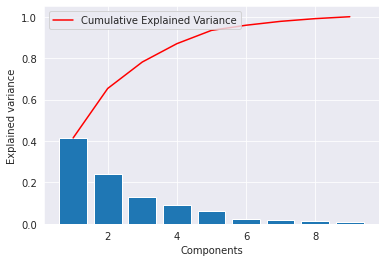

In [14]:
plt.bar(range(1,len(pca.explained_variance_ratio_ ) + 1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [15]:
t00 = [i[0] for i in pca_data]
t01 = [i[1] for i in pca_data]
t02 = [i[2] for i in pca_data]
t10 = [i[3] for i in pca_data]
t11 = [i[4] for i in pca_data]

pca_df = pd.DataFrame({'0-0': t00, '0-1': t01, '0-2': t02, '1-0': t10, '1-1': t11,})
pca_df.describe()

,0-0,0-1,0-2,1-0,1-1
count,1.169500e+04,1.169500e+04,1.169500e+04,1.169500e+04,1.169500e+04
mean,-8.748880e-17,-5.346538e-17,2.187220e-17,-1.701171e-17,-1.716360e-17
std,4.979463e-01,3.780868e-01,2.763833e-01,2.301967e-01,1.958433e-01
min,-8.278399e-01,-6.490918e-01,-5.083912e-01,-2.672470e-01,-4.647851e-01
25%,-4.011558e-01,-3.484416e-01,-1.329710e-01,-1.493265e-01,-1.397857e-01
50%,-1.356829e-01,8.838093e-02,-5.197289e-02,-6.012663e-02,-9.893916e-03
75%,2.947154e-01,3.034187e-01,1.024133e-01,4.090291e-02,8.313518e-02
max,1.192270e+00,8.355367e-01,9.047954e-01,1.242217e+00,9.928911e-01


In [16]:
scaler = StandardScaler().fit(pca_df)

pca_transformed = scaler.transform(pca_df)

transformed_df = pd.DataFrame(data=pca_transformed, columns=['0-0', '0-1', '0-2', '1-0', '1-1'])
transformed_df.head(15)

,0-0,0-1,0-2,1-0,1-1
0,-1.285944,0.669679,-0.163185,-0.500725,-0.428294
1,-1.475314,0.308887,-0.196420,3.614666,-1.898546
2,-1.201413,0.778705,-0.251500,-0.476727,-0.117249
3,-1.216669,0.685649,-0.187013,-0.551381,-0.349586
4,-0.955370,-1.690859,-0.214127,3.144237,-0.910153
5,-1.110796,0.430058,-0.101630,0.663963,-0.464700
6,-0.804464,0.679480,-0.156728,1.023853,-0.230744
7,-1.055265,0.209133,0.179033,-1.008262,-0.190822
8,-1.190709,0.372288,-0.209809,-0.475587,-0.248205
9,-0.952498,0.598260,-0.120735,1.346067,0.449785


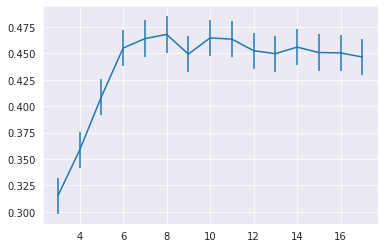

In [17]:
min_k = 3
max_k = 18

confidence_coefficient = 1 - 0.05
sample = 11695

if os.path.exists('./cluster-results/users-profiles/silhouette-scores.txt'):
    silhouette_values = np.loadtxt('./cluster-results/users-profiles/silhouette-scores.txt', delimiter=',')
    confidence_interval = np.loadtxt('./cluster-results/users-profiles/silhouette-intervals.txt', delimiter=',')
else:
    silhouette_values = np.ndarray(max_k - min_k)
    for i in range(min_k, max_k):
        silhouettes = np.ndarray(10)
        for j in range(10):
            kmeans = MiniBatchKMeans(n_clusters=i).fit(transformed_df)
            labels = kmeans.labels_
            silhouettes[j] = silhouette_score(transformed_df, labels)
            
        silhouette_values[i - min_k] = silhouettes.mean()

    confidence_interval = list(map(lambda mean: (mean - (1.960 * confidence_coefficient / math.sqrt(sample)),
                                                 mean + (1.960 * confidence_coefficient / math.sqrt(sample))),
                                   silhouette_values))
    
    np.savetxt('./cluster-results/users-profiles/silhouette-scores.txt', silhouette_values, fmt='%f', delimiter=',')
    np.savetxt('./cluster-results/users-profiles/silhouette-intervals.txt', confidence_interval, fmt='%f', delimiter=',')
    
# sns.lineplot(x=range(min_k, max_k), y=[x[0] for x in confidence_interval], markers=True, color='purple')
# sns.lineplot(x=range(min_k, max_k), y=[x[1] for x in confidence_interval], markers=True, color='purple')    
# sns.lineplot(x=range(min_k, max_k), y=silhouette_values, markers=True)

error = 1.960 * confidence_coefficient / math.sqrt(sample)
plt.errorbar(x=range(min_k, max_k), y=silhouette_values, yerr=[error for x in range(15)])
plt.show()

## Teste de vários clusters

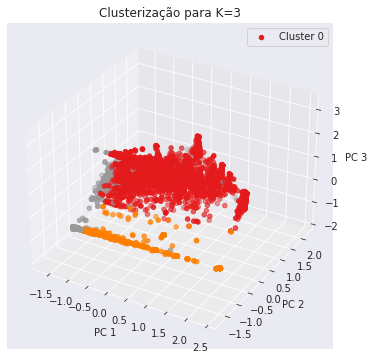

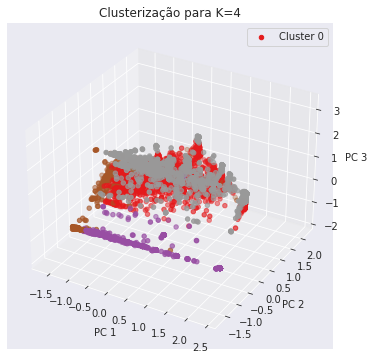

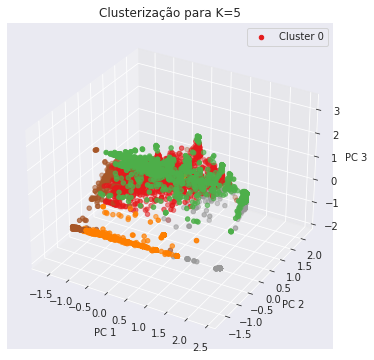

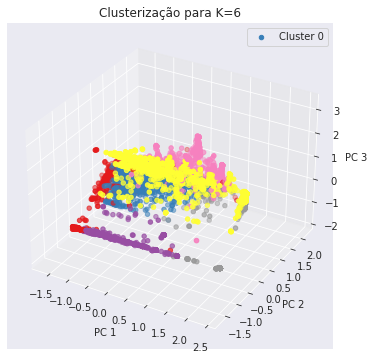

In [18]:
plots_df = transformed_df
random_factors = np.ndarray(11 - 3)

for i in range(3, 7):
    random_seed = random.randint(min_k, max_k)
    random_factors[i - 3] = random_seed
    kmeans = MiniBatchKMeans(n_clusters=i, random_state=random_seed).fit(transformed_df)
    labels = list(map(lambda x: str(x), kmeans.labels_))
    plots_df['Labels'] = labels
    
    # plt.title('Clusterização para K=%d' % i)
    # plt.xlabel('Componente principal 1')
    # plt.ylabel('Componente principal 2')
    # sns.scatterplot(data=plots_df, x='0-0', y='0-1', hue='Labels', palette='bright')
    # plt.show()
    
    sns.set_style ("darkgrid")
    plt.figure (figsize = (7, 6))
    plot_axes = plt.axes(projection = '3d')
    plot_axes.scatter3D(plots_df['0-0'], plots_df['0-1'], plots_df['0-2'], c=kmeans.labels_, cmap="Set1")
    
    plt.legend([('Cluster %d' % i) for i in range(0, i)])
    plt.title('Clusterização para K=%d' % i)
    plot_axes.set_xlabel('PC 1')
    plot_axes.set_ylabel('PC 2')
    plot_axes.set_zlabel('PC 3')
    
    plt.show()
    
    plots_df.to_csv('./cluster-results/users-profiles/clusters-3-to-6/clusters-k-' + str(i) + '.csv', sep='\t')
    
np.savetxt('./cluster-results/users-profiles/random-seeds.txt', random_factors, fmt='%f', delimiter=',')

Observado que em K = 3 existem 3 clusters básicos e em K = 4 surge um intermediário entre dois deles, a partir do 5 o mesmo cluster parece que se parte em 2, talvez sendo desnecessário. Dessa maneira é melhor termos K = 4.

In [10]:
k = 4

kmeans = MiniBatchKMeans(n_clusters=k).fit(transformed_df)
labels = kmeans.labels_

transformed_df['labels'] = labels
df['labels'] = labels

df.to_csv('./ubmg-data/dataframe/users-profile.tsv', sep='\t')

df.head()

,Unnamed: 0.1,Unnamed: 0,user,0-0,0-1,0-2,1-0,1-1,1-2,2-0,2-1,2-2,labels
0,0,0,187754506--1001034598292,0.875000,0.083333,0.041667,0.000000,0.962264,0.037736,0.030000,0.060000,0.910000,3
1,1,0,83860966--1001034598292,0.000000,1.000000,0.000000,0.038462,0.923077,0.038462,0.000000,0.200000,0.800000,3
2,2,0,30358316--1001034598292,0.895652,0.069565,0.034783,0.012797,0.897623,0.089580,0.007564,0.072617,0.919818,3
3,3,0,36412875--1001034598292,0.894737,0.105263,0.000000,0.016949,0.932203,0.050847,0.032258,0.064516,0.903226,3
4,4,0,33928731--1001034598292,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3


In [11]:
clusters = []

for cluster in range(k):
    clusters.append(df.query('labels == %d' % cluster))

In [12]:
for i in range(k):
    clusters[i].to_csv('./ubmg-data/dataframe/users-cluster-' + str(i) + '.tsv', sep='\t')